# Can you drink more coffee than your coworkers?

https://fivethirtyeight.com/features/can-you-drink-more-coffee-than-your-coworkers/

> Riddler Headquarters is a buzzing hive of activity. Mathematicians, statisticians and programmers roam the halls at all hours, proving theorems and calculating probabilities. They’re fueled, of course, by caffeine. But the headquarters has just one coffee pot, along with one unbreakable rule: You finish the joe, you make some mo’.
>
> Specifically, the coffee pot holds one gallon of coffee, and workers fill their mugs from it in sequence. Whoever takes the last drop has to make the next pot, no ifs, ands or buts. Every worker in the office is trying to take as much coffee as he or she can while minimizing the probability of having to refill the pot. Also, this pot is both incredibly heavy and completely opaque, so it’s tough to tell how much remains. That means a worker can’t keep pouring until she sees or feels just a drop left. Anyone stuck refilling the pot becomes so frustrated that they throw their cup to the ground in frustration, so they get no coffee that round.
>
> Congratulations! You’ve just been hired to work at Riddler Headquarters. Submit a number between 0 and 1. (It could be 0.9999, or 0.0001, or 0.5, or 0.12345, and so on.) This is the number of gallons of coffee you will attempt to take from the pot each time you go for a cup. If that amount remains, lucky you, you get to drink it. If less remains, you’re out of luck that round; you must refill the pot, and you get no coffee.
> 
> Once I’ve received your submissions, I’ll randomize the order in which you and your colleagues head for the pot. Then I’ll run a lot of simulations — thousands of hypothetical trips to the coffee pot in the Riddler offices. Whoever drinks the most coffee is the ☕ Caffeine King or Queen ☕ of Riddler Headquarters!

In [58]:
%matplotlib inline

In [171]:
from IPython.display import HTML, FileLink
import imageio
import io
import itertools
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import string



def generate_names(n, length=5):
    return [''.join(s) for s in np.random.choice(list(string.ascii_uppercase), size=(n, length))]


def generate_list(n, seed_values=None):
    """Create a list of coworkers with their preferred coffee amount.
    """
    # names = generate_names(n)
    if seed_values is not None:
        values = np.random.uniform(low=0.0, high=1.0, size=n-len(seed_values))
        values = np.concatenate([values, seed_values], axis=0)
    else:
        values = np.random.uniform(low=0.0, high=1.0, size=n)
    return [{'value': value, 'hit': 0, 'miss': 0, 'coffee': 0} for value in values]


def run_simulation(entries, n_rounds=100):
    n_round=0
    volume = 1.0
    for idx in itertools.cycle(range(len(entries))):
        entry = entries[idx]
        v = entry['value']
        if v >= volume:
            # no coffee for you
            entry['miss'] += 1
            volume = 1.0
            n_round += 1
            if n_round >= n_rounds:
                break
        else:
            volume -= v
            entry['hit'] += 1
            entry['coffee'] += v
    df = pd.DataFrame(entries)
    df['n_rounds'] = n_rounds
    return df




In [147]:
entries = generate_list(n=10**4)
df = run_simulation(entries, n_rounds=10**7)
df.head()

,coffee,hit,miss,value,n_rounds
0,1586.824711,2702,0,0.587278,10000000
1,800.718889,2702,0,0.296343,10000000
2,0.000000,0,2702,0.326311,10000000
3,2316.381177,2702,0,0.857284,10000000
4,0.000000,0,2702,0.298722,10000000


In [148]:
df.groupby(pd.qcut(df['value'], 10)).mean()

,coffee,hit,miss,value,n_rounds
value,,,,,
"(-0.000891, 0.101]",129.003817,2560.753,140.467,0.051171,10000000.0
"(0.101, 0.205]",352.717600,2323.097,378.171,0.152508,10000000.0
"(0.205, 0.306]",544.856884,2144.783,556.453,0.254895,10000000.0
"(0.306, 0.407]",677.528884,1904.378,796.878,0.356432,10000000.0
"(0.407, 0.504]",766.609990,1685.571,1015.666,0.455446,10000000.0
"(0.504, 0.599]",843.519311,1531.598,1169.629,0.552115,10000000.0
"(0.599, 0.7]",890.006839,1372.230,1329.014,0.650008,10000000.0
"(0.7, 0.805]",968.277538,1288.492,1412.756,0.752110,10000000.0
"(0.805, 0.904]",996.501187,1166.933,1534.296,0.854491,10000000.0


''

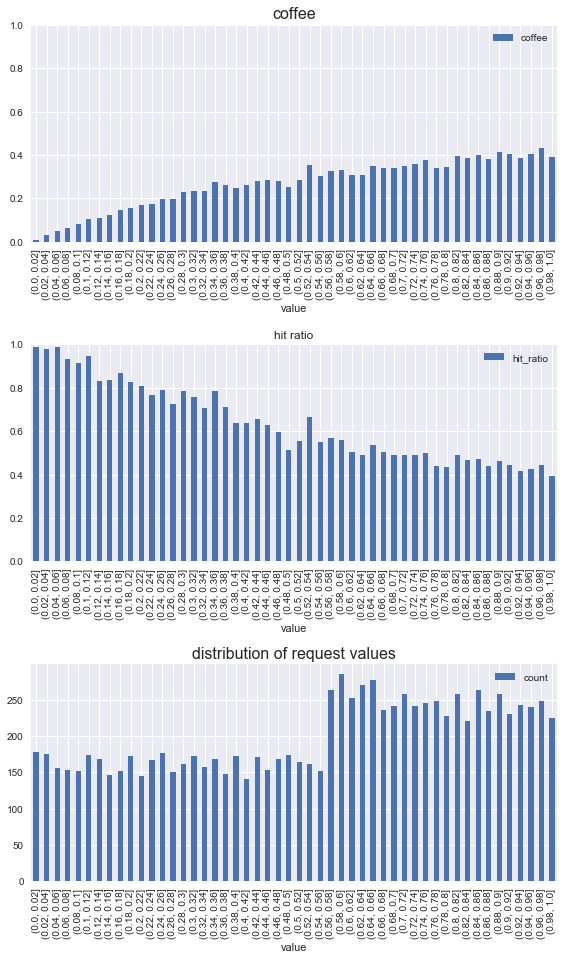

In [178]:
def plot_distributions(df):
    nrows = 3
    fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(8, 4.5*nrows))
    #cut = pd.qcut(df['value'], 40)
    bins = np.linspace(0, 1, 51)
    cut = pd.cut(df['value'], bins)
    # expected value of coffee
    (
        df
        .assign(coffee=lambda r: r['coffee'] / (r['hit'] + r['miss']))
        .groupby(cut)
        .mean()
        .plot
        .bar(y='coffee', ax=axes[0])
    )
    axes[0].set_title('coffee', fontsize=16)
    axes[0].set_ylim([0, 1.0])
    # hit ratio
    (
        df
        .assign(hit_ratio=lambda r: r['hit'] / (r['hit'] + r['miss']))
        .groupby(cut)
        .mean()
        .plot
        .bar(y='hit_ratio', ax=axes[1])
    )
    axes[1].set_title('hit ratio')
    axes[1].set_ylim([0, 1.0])
    # distribution of request values
    df.groupby(cut).count().rename(columns={'n_rounds': 'count'}).plot.bar(y='count', ax=axes[2])
    axes[2].set_title('distribution of request values', fontsize=16)
    fig.tight_layout()
    return fig
    
plot_distributions(df)
;

In [150]:
df.sort_values('coffee', ascending=False).head(10)['value'].tolist()

[0.9999701581778779,
 0.999669658553645,
 0.9996072325877359,
 0.9994170122668662,
 0.9987430813388967,
 0.998645894095327,
 0.998009710442606,
 0.9981835239539002,
 0.9980454734008573,
 0.9979921107781018]

In [151]:
n_seed_values = len(df) // 5
seed_values = df.sort_values('coffee', ascending=False).head(n_seed_values)['value'].tolist()
entries = generate_list(n=10**4, seed_values=seed_values)
df = run_simulation(entries, n_rounds=10**7)
df.head()

,coffee,hit,miss,value,n_rounds
0,300.097072,2551,0,0.117639,10000000
1,288.244610,2551,0,0.112993,10000000
2,0.000000,0,2551,0.945086,10000000
3,630.124201,2551,0,0.247011,10000000
4,1369.821607,2551,0,0.536974,10000000


''

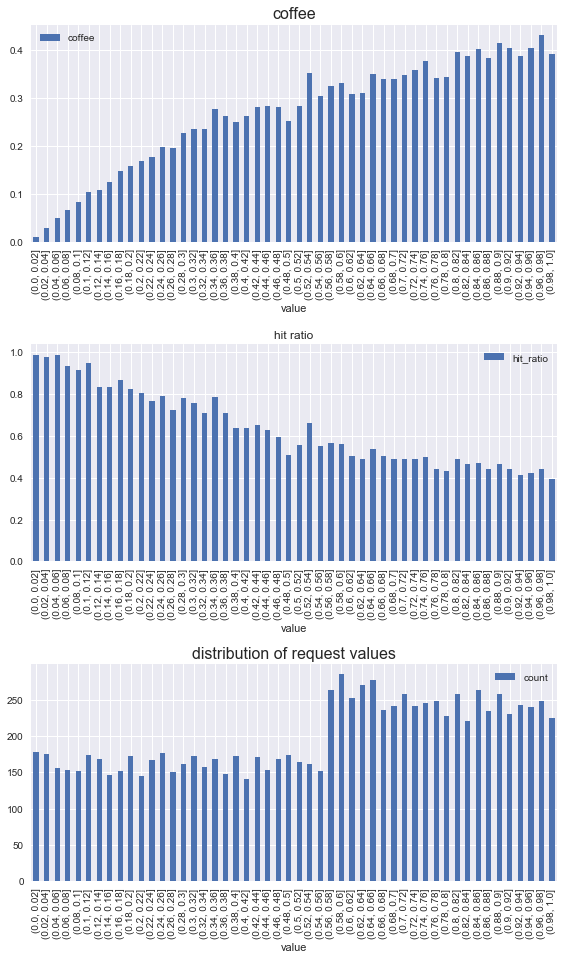

In [153]:
plot_distributions(df)
;

In [190]:
def sample_previous_list(values, weights):
    """Randomly sample with replacement based on the weights from the previous simulation.
    """
    values = np.random.choice(values, size=len(values), replace=True, p=weights/weights.sum())
    scale = 10**-5
    values = values + np.random.normal(loc=0.0, scale=scale, size=len(values))
    values = np.clip(values, 0.0, 1.0)
    return [{'value': value, 'hit': 0, 'miss': 0, 'coffee': 0} for value in values]



def create_simulation_animation(video_filepath):
    random_sample = True
    seed_fraction = 0.2
    n_entries = 10**4
    n_rounds = 10**5
    entries = None
    n_frames = 90
    fps = 3
    video_writer = imageio.get_writer(video_filepath, mode='I', fps=fps)
    
    for i in range(n_frames):
        if entries is None:
            entries = generate_list(n=n_entries)
            df = run_simulation(entries, n_rounds=n_rounds)
        elif random_sample:
            entries = sample_previous_list(df['value'], df['coffee'])
            df = run_simulation(entries, n_rounds=n_rounds)
        else:
            n_seed_values = int(len(df) * seed_fraction)
            seed_values = df.sort_values('coffee', ascending=False).head(n_seed_values)['value'].tolist()
            entries = generate_list(n=n_entries, seed_values=seed_values)
            df = run_simulation(entries, n_rounds=n_rounds)
        f = plot_distributions(df)
        buf = io.BytesIO()
        f.savefig(buf, format='png')
        plt.close()
        buf.seek(0)
        img = imageio.imread(buf)
        video_writer.append_data(img)
    video_writer.close()
    return HTML(
        """
        <video width="976" height="576" controls>
          <source src="{}" type="video/mp4">
        </video>
        """.format(video_filepath)
    )

video_filepath = os.path.expanduser('./simulation_progress.mp4')
create_simulation_animation(video_filepath)

In [176]:
FileLink(video_filepath)

/home/dennis/workspace/PublicNotebooks/fivethirtyeight/simulation_progress.mp4